# 1. Investigación de la Estructura
Exploración general de la forma del conjunto de datos, así como de los tipos de datos.

In [1777]:
# using pandas and the classic dataset titanic of Kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train = pd.read_excel(r'.\train.xlsx')
test = pd.read_csv(r'.\test.csv')

In [1778]:
# Show size of the dataset
train.shape

(892, 12)

In [1779]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [1780]:
# Count how many times each data type is present in the dataset
# object: 5 Variables Categóricas
# int64: 5 Variables Enteras
# float64: 2 Variables Reales
pd.value_counts(train.dtypes)

object     5
int64      5
float64    2
dtype: int64

In [1781]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  892 non-null    int64  
 1   Survived     892 non-null    int64  
 2   Pclass       892 non-null    int64  
 3   Name         892 non-null    object 
 4   Sex          892 non-null    object 
 5   Age          715 non-null    float64
 6   SibSp        892 non-null    int64  
 7   Parch        892 non-null    int64  
 8   Ticket       892 non-null    object 
 9   Fare         892 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     890 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.8+ KB


In [1782]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


## 1.1. Estructura de las características NO NUMÉRICAS

Once this is taken care of, we can use the `.describe()` function to investigate how many unique values each non-numerical feature has and with which frequency the most prominent value is present - using the code `df_X.describe(exclude="number")` :

In [1783]:
train.describe(exclude="number")

,Name,Sex,Ticket,Cabin,Embarked
count,892,892,892,204,890
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,1601,C23 C25 C27,S
freq,2,578,7,4,644


4. Name: nombre del pasajero. - EXTRACT INFO (Mr., Miss,..) THEN DISCARD (doesn’t add much value in predicting the target variable).
5. Sex: sexo del pasajero. - 0 NA CATEGORICAL to NUMERICAL 0:male - 1:female
9. Ticket: identificador del billete. - DISCARD (doesn’t add much value in predicting the target variable).
11. Cabin: identificador del camarote asignado al pasajero. - CATEGORICAL to NUMERICAL
12. Embarked: puerto en el que embarcó el pasajero. - CATEGORICAL to NUMERICAL

## 1.2. Structure of numerical features

In [1784]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,892.000000,892.000000,892.000000,715.000000,892.000000,892.000000,892.000000
mean,446.500000,0.383408,2.309417,29.702336,0.522422,0.381166,32.176793
std,257.642517,0.486489,0.835923,14.516576,1.102264,0.805706,49.672283
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.750000,0.000000,2.000000,20.250000,0.000000,0.000000,7.895800
50%,446.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,669.250000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,892.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. PassengerId: identificador único del pasajero - DISCARD (no añade valor predictivo a la variable objetivo).
2. Survived: si el pasajero sobrevivió al naufragio, codificada como 0 (no) y 1 (si).  VARIABLE OBJETIVO
3. Pclass: clase a la que pertenecía el pasajero: 1, 2 o 3.
6. Age: edad del pasajero. - Se observan valores REALES (cuando TODOS deben ser Enteros)
7. SibSp: número de hermanos, hermanas, hermanastros o hermanastras en el barco.
8. Parch: número de padres e hijos en el barco.
10. Fare: precio pagado por el billete.

### Cantidad de valores distintos de todas las variables NUMÉRICAS (en escala logarítmica)

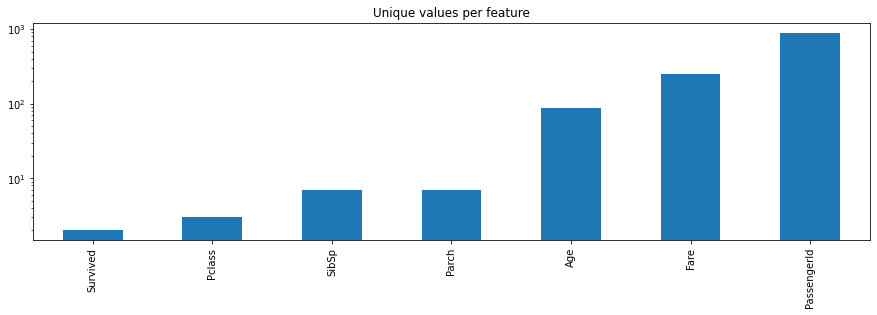

In [1785]:
# For each numerical feature compute number of unique entries
unique_values = train.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4),title="Unique values per feature");

### Histograma: Rango y distribución de valores por cada variable NUMÉRICA

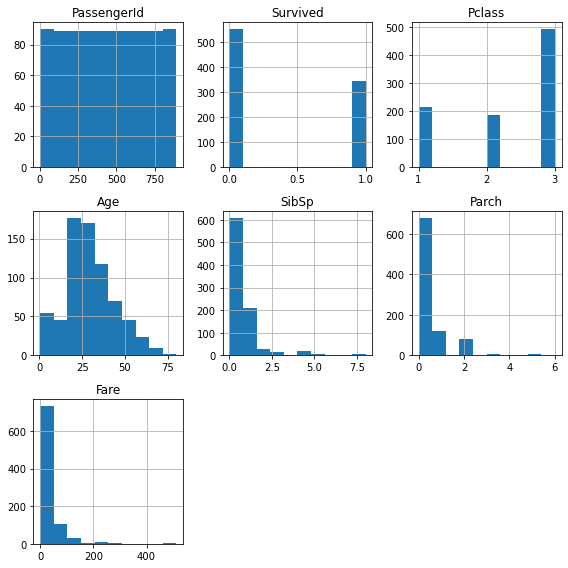

In [1786]:
# Histograma de valores NUMÉRICOS
train.hist(figsize=(8,8)) 
#set a large figsize if you have > 9 variables
plt.tight_layout()
plt.show()

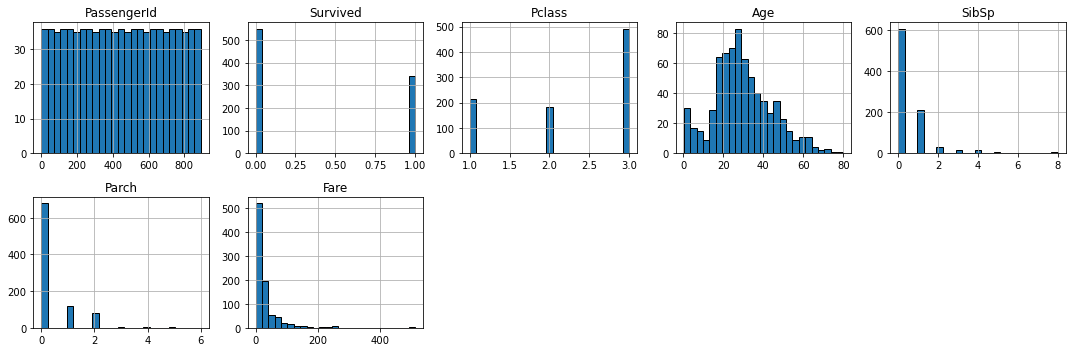

In [1787]:
# Plots the histogram for each numerical feature in a separate subplot
train.hist(bins=25, figsize=(15, 5), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

### Histograma: Dettalle de valores distintos (una gráfica por cada variable CATEGÓRICA)

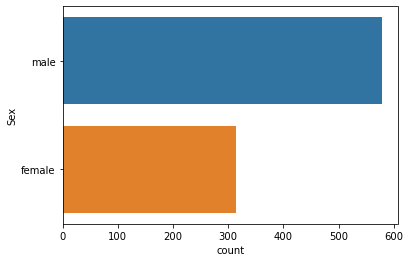

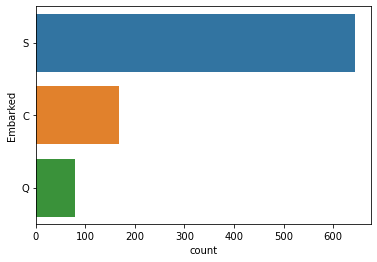

In [1788]:
for column in train.select_dtypes(include='object'):
    if train[column].nunique() < 10:
        sns.countplot(y=column, data=train)
        plt.show()

## 1.3. Conclusiones de la Investigación de la Estructura

K

# 2. Investigación Cualitativa
Get a feeling for the general quality of the dataset, with regards to duplicates, missing values and unwanted entries.

## 2.1. Duplicados

In [1789]:
# Check number of duplicates while ignoring the index feature
# Se ha añadido una fila duplicada al dataset original para comprobar la identificación de duplicados
n_duplicates = train.drop(labels=["PassengerId"], axis=1).duplicated().sum()
print(f"You seem to have {n_duplicates} duplicate(s) in your database.")

You seem to have 1 duplicate(s) in your database.


In [1790]:
#  Extract column names of all features, except 'Accident_Index'
columns_to_consider = train.drop(labels=["PassengerId"], axis=1).columns
# Se elimina la fila duplicada, ya disponemos del dataset original
train = train.drop_duplicates(subset=columns_to_consider)
train.shape

(891, 12)

In [1791]:
# Se eliminan variables identificativas (una por fila) que no son predictivas (un valor por feature)
train.drop(['Ticket','PassengerId'], 1, inplace=True) 
train.shape

(891, 10)

### 2.2. Missing values

### 2.2.1. Per sample

In [1792]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Muestra de valores missing (TODAS las variables)

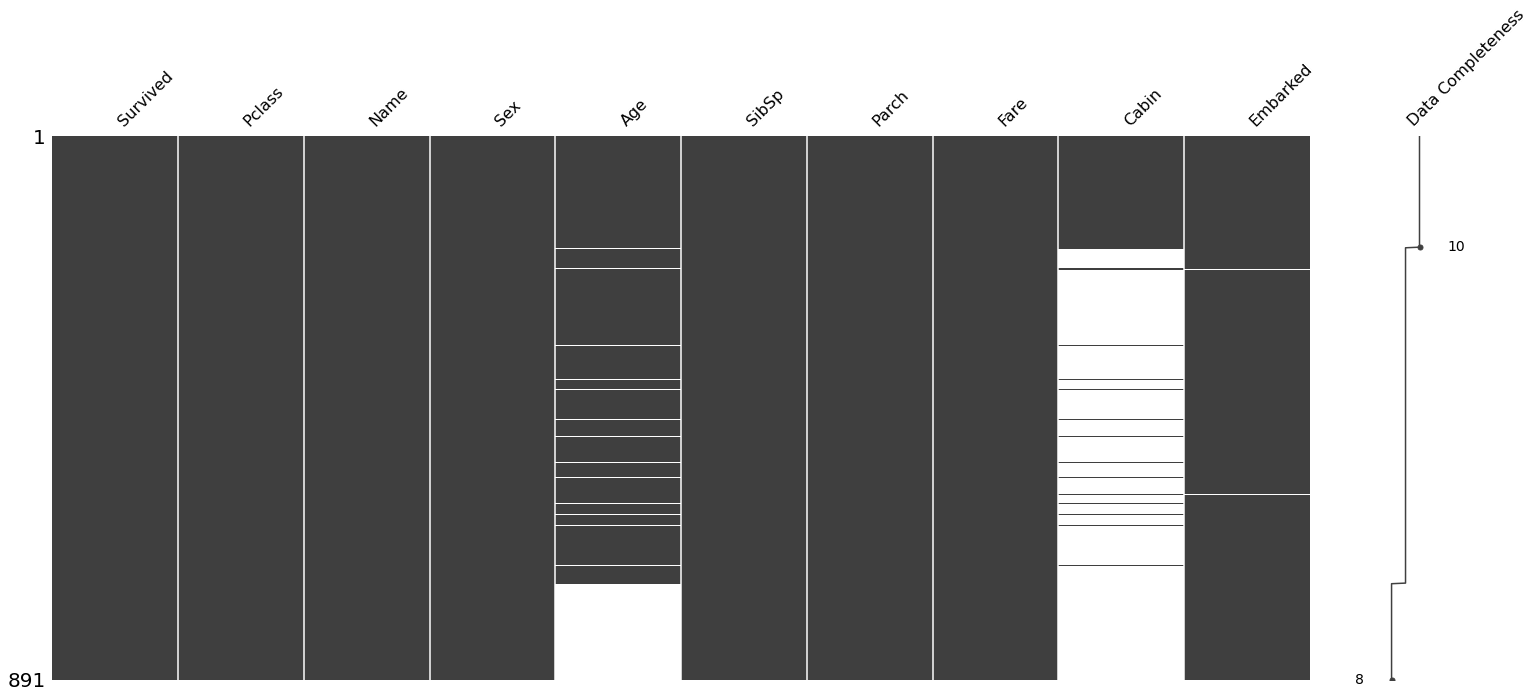

In [1793]:
import missingno as msno
msno.matrix(train, labels=True, sort="descending");

### Muestra de valores missing (TODAS las variables) ordenadas de menor a mayor

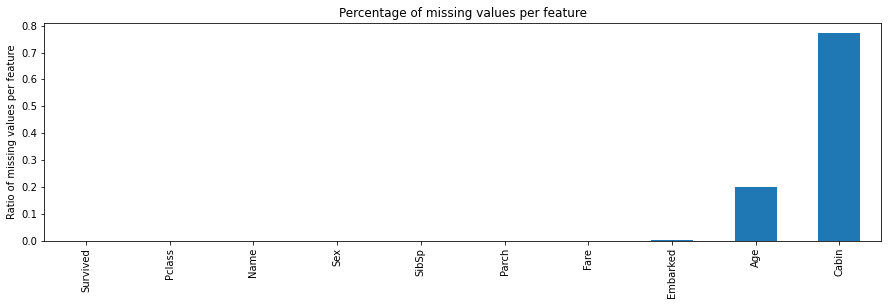

In [1794]:
# Muestra el ratio de valores missing por variable
train.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

### Función para extracción de la primera letra o rellenado automático para valores missing 

In [1795]:
def assignDeckValue(CabinCode):
    '''No value="Unknown" else extract the first letter of the cabin
       Value= Fill with th word Unknown'''
    if pd.isnull(CabinCode):
        category = 'Unknown'
    else:
        category = CabinCode[0]
    return category

### Extracción y comprobación de valores

In [1796]:
Deck = np.array([assignDeckValue(cabin) for cabin in train['Cabin'].values])
Deck[0:15]

array(['Unknown', 'C', 'Unknown', 'C', 'Unknown', 'Unknown', 'E',
       'Unknown', 'Unknown', 'Unknown', 'G', 'C', 'Unknown', 'Unknown',
       'Unknown'], dtype='<U7')

### Carga de los datos de la nueva variable 'Deck' en el dataset

In [1797]:
train = train.assign(Deck = Deck)

### Se muestra la cantidad de valores por categoría (en éste caso 'Deck')
Se observa una gran proporción de valores faltantes

In [1798]:
train['Deck'].value_counts()

Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: Deck, dtype: int64

### Extracción de los títulos mencionados en los nombres de los pasajeros
Se usan 'expression pattern', se carga la información en el dataset, en la nueva característica llamada 'Title'

In [1799]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

### Comprobación de que las nuevas columnas 'Deck' y 'Title' no tienen campos missing

In [1800]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
Deck          0
Title         0
dtype: int64

### Se observan los valores de las nuevas columnas 'Deck' y 'Title' integradas en el dataset original

In [1801]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Unknown,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Unknown,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,C,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Unknown,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,Unknown,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,B,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S,Unknown,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,C,Mr


### Cantidad de valores de una variable discreta concreta
Se observan títulos con mayor grado de supervivencia

In [1802]:
train[["Title", "Survived"]].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
16,Sir,1.000000
2,Countess,1.000000
14,Ms,1.000000
11,Mme,1.000000
6,Lady,1.000000
10,Mlle,1.000000
13,Mrs,0.792000
9,Miss,0.697802
8,Master,0.575000
1,Col,0.500000


### Histograma con distribución de Títulos (de mayor a menor) - Formato gráfico

<AxesSubplot:>

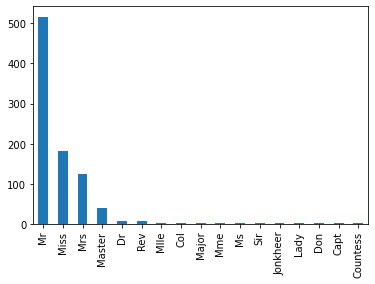

In [1803]:
# Se observa gráficamente la distribución de valores de la nueva variable 'Title'
train['Title'].value_counts().plot(kind='bar')

### Tabla con distribución de Títulos (de mayor a menor)

In [1804]:
# Se observa que muchos de ellos, a partir de Dr, están poco representados
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Mme           1
Ms            1
Sir           1
Jonkheer      1
Lady          1
Don           1
Capt          1
Countess      1
Name: Title, dtype: int64

### Edad media de las personas con cada título

In [1805]:
# Se observa que 'Master'(Maestro) por la edad media en realidad se refiere a niños
means = train.groupby('Title')['Age'].mean()
means

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [1806]:
# Se confirma que se trata de niños de 0 a 12 años
kid = train[train['Title'] == 'Master']
kid['Age']

7       2.00
16      2.00
50      7.00
59     11.00
63      4.00
65       NaN
78      0.83
125    12.00
159      NaN
164     1.00
165     9.00
171     4.00
176      NaN
182     9.00
183     1.00
193     3.00
261     3.00
278     7.00
305     0.92
340     2.00
348     3.00
386     1.00
407     3.00
445     4.00
480     9.00
489     9.00
549     8.00
709      NaN
751     6.00
755     0.67
787     8.00
788     1.00
802    11.00
803     0.42
819    10.00
824     2.00
827     1.00
831     0.83
850     4.00
869     4.00
Name: Age, dtype: float64

### Histograma: Cantidad de valores de una variable contínua específica

<AxesSubplot:>

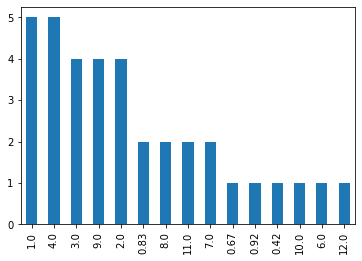

In [1807]:
# Se muestra gráficamente cómo se agrupan
kids['Age'].value_counts().plot(kind='bar')

### Filtrado de dataset por características ('Master')

In [1808]:
# Se observa que todos los 'Master' son varones pertenecientes a las 3 clases de pasajeros
train[(train.Title == "Master")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Title
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,21.0750,NaN,S,Unknown,Master
16,0,3,"Rice, Master. Eugene",male,2.00,4,1,29.1250,NaN,Q,Unknown,Master
50,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,39.6875,NaN,S,Unknown,Master
59,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,46.9000,NaN,S,Unknown,Master
63,0,3,"Skoog, Master. Harald",male,4.00,3,2,27.9000,NaN,S,Unknown,Master
65,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,15.2458,NaN,C,Unknown,Master
78,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,29.0000,NaN,S,Unknown,Master
125,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,11.2417,NaN,C,Unknown,Master
159,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,69.5500,NaN,S,Unknown,Master
164,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,39.6875,NaN,S,Unknown,Master


### Filtrado de dataset por características (Sex == 'female' & Age < 12)
Se observa que las niñas (girls) se encuentran dentro del Title 'Miss'

In [1809]:
train[(train.Sex == "female") & (train.Age < 12)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Title
10,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,16.7000,G6,S,G,Miss
24,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,21.0750,NaN,S,Unknown,Miss
43,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,41.5792,NaN,C,Unknown,Miss
58,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,27.7500,NaN,S,Unknown,Miss
119,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,31.2750,NaN,S,Unknown,Miss
147,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.00,2,2,34.3750,NaN,S,Unknown,Miss
172,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,11.1333,NaN,S,Unknown,Miss
184,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.00,0,2,22.0250,NaN,S,Unknown,Miss
205,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,10.4625,G6,S,G,Miss
233,1,3,"Asplund, Miss. Lillian Gertrud",female,5.00,4,2,31.3875,NaN,S,Unknown,Miss


### Cantidad de valores de una variable discreta con 2 condiciones 
('Sex'=='Female' y 'Title')

<AxesSubplot:>

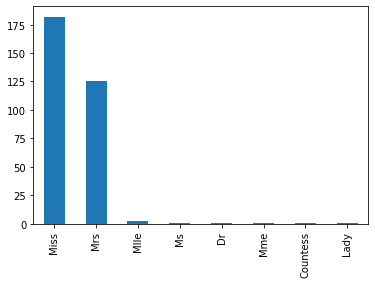

In [1810]:
# Se muestran los grupos que componen las personas de sexo femenino 
female = train[train['Sex'] == 'female']
female['Title'].value_counts().plot(kind='bar')

### Cantidad de valores de una variable discreta con 2 condiciones 
('Sex'=='Male' y 'Title')

<AxesSubplot:>

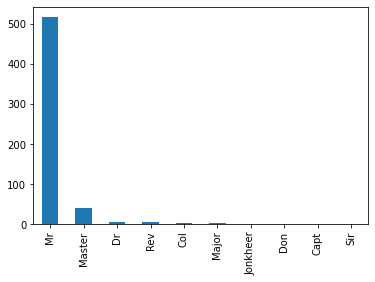

In [1811]:
# Se muestran los grupos que componen las personas de sexo masculino 
males = train[train['Sex'] == 'male']
males['Title'].value_counts().plot(kind='bar')

### Con la prueba anterior se observa que Dr incluye male y female, se AGRUPA en base a ello

In [1812]:
train['Title'] = np.where((train['Title'] == 'Dr') & (train['Sex'] == 'female') , 'Mrs', train['Title'])
train['Title'] = np.where((train['Title'] == 'Dr') & (train['Sex'] == 'male') , 'Mr', train['Title'])

### Se observa que ya no existe el grupo 'Dr'

In [1813]:
train['Title'].value_counts()

Mr          523
Miss        182
Mrs         126
Master       40
Rev           6
Mlle          2
Col           2
Major         2
Capt          1
Sir           1
Mme           1
Ms            1
Jonkheer      1
Lady          1
Don           1
Countess      1
Name: Title, dtype: int64

### Se observa la proporción de pasajeros male y female

In [1814]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Se AGRUPAN las categorías de la variable 'Title'
(a excepción de Master que se cambia el nombre por Boys)

In [1815]:
train['Title'] = train['Title'].replace(['Rev','Col','Major','Sir','Jonkheer','Capt','Don'], 'Mr')
train['Title'] = train['Title'].replace('Master', 'Boys')
train['Title'] = train['Title'].replace(['Mme','Lady','Countess'], 'Mrs')
train['Title'] = train['Title'].replace(['Mlle','Ms'], 'Miss')

### Se observa el resultado de la agrupación anterior

In [1816]:
# Se observa el resultado de la agrupación
train['Title'].value_counts()

Mr      537
Miss    185
Mrs     129
Boys     40
Name: Title, dtype: int64

### Histograma: Distribución de valores de variable 'Title'

<AxesSubplot:>

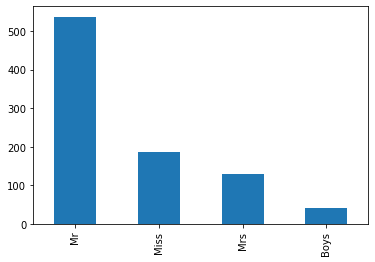

In [1817]:
# Se muestran gráficamente las nuevas agrupaciones
train['Title'].value_counts().plot(kind='bar')

### Extraída la información relevante, se eliminan las variables 'Cabin' y 'Name' 

In [1818]:
train.drop(['Cabin','Name'], 1, inplace=True) 
train.shape

(891, 10)

### Se observa que quedan 2 variables con missings ('Age' y 'Embarked')

In [1819]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Deck          0
Title         0
dtype: int64

### Se muestra la distribución de valores por categoría 'Embarked'
Se observa que la mayoría de pasajeros han partido de S 

In [1820]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### OPCIÓN 1: Uso de la moda para cumplimentar MANUALMENTE los missing de la variable 'Embarked' 

In [1821]:
# common = 'S'
# df['Embarked']=df['Embarked'].fillna('S')

### OPCIÓN 2: Uso de la moda para cumplimentar AUTOMÁTICAMENTE los missing de la variable 'Embarked' 

In [1822]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)
# Confirmación de que no quedan campos missing en la variable 'Embarked'
train['Embarked'].isnull().sum()

0

### Se extrae la EDAD MEDIA de los diferentes grupos representados

In [1823]:
means = train.groupby('Title')['Age'].mean()
means

Title
Boys     4.574167
Miss    21.845638
Mr      32.984412
Mrs     35.991071
Name: Age, dtype: float64

### Lista de los diferentes títulos

In [1824]:
title_list = ['Miss','Mr','Mrs','Boys']

### Función para cargar el valor medio a cada grupo representado

In [1825]:
def age_missing_replace(means, dframe, title_list):
    for title in title_list:
        temp = dframe['Title'] == title 
        dframe.loc[temp, 'Age'] = dframe.loc[temp, 'Age'].fillna(means[title]) 

        
age_missing_replace(means, train, title_list)

### Comprobación de que no quedan campos missing en la variable 'Age'

In [1826]:
train['Age'].isnull().sum()

0

### Comprobación de valores missing (todas las variables)

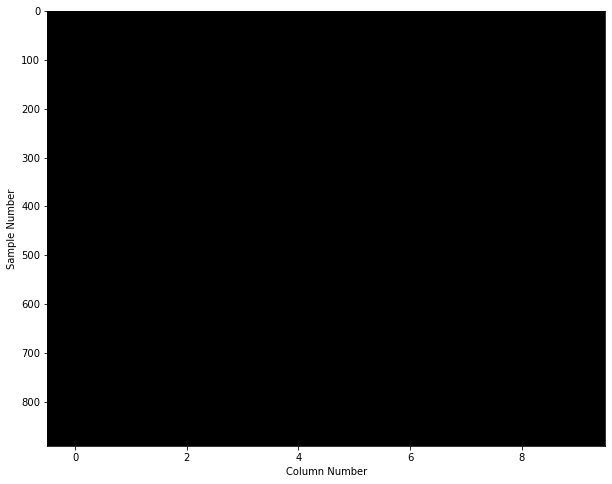

In [1827]:
# librería 1 para comprobar gráficamente los missing del dataset
# se observa que no quedan missings
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(train.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

### Valores missing (todas las variables)

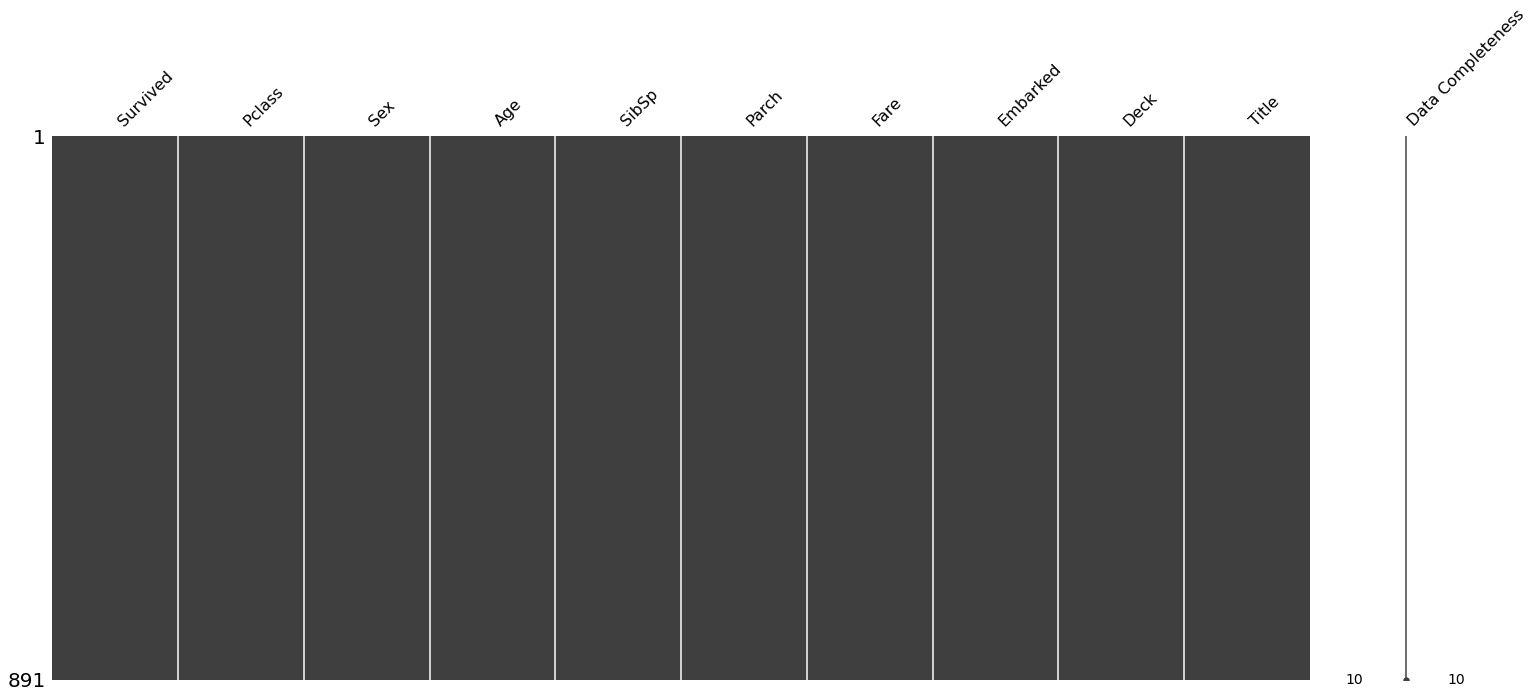

In [1828]:
# librería 2 para comprobar gráficamente los missing del dataset
# se observa que no quedan missings
import missingno as msno
msno.matrix(train, labels=True, sort="descending");

In [1829]:
# Función para eliminar las filas que tienen más de un 20% de valores missing
# axis = 0 : Por fila
train = train.dropna(thresh=df.shape[1] * 0.80, axis=0).reset_index(drop=True)
train.shape

(891, 10)

### Comprobación numérica de que no quedan en el dataset valores missing

In [1830]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Deck        0
Title       0
dtype: int64

### 2.2.2. Per Feature

### Valores missing (todas las variables), de menor a mayor

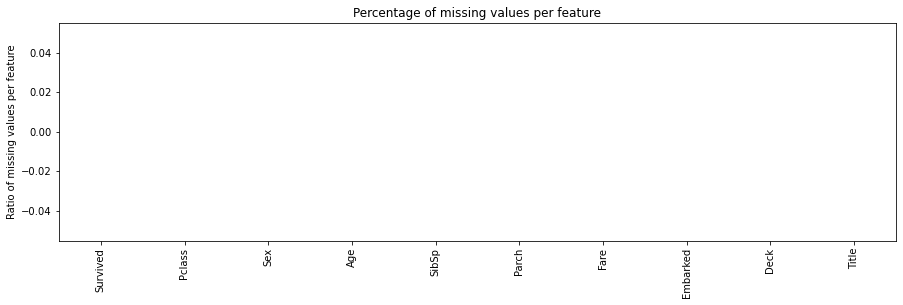

In [1831]:
# Muestra el ratio de valores missing por variable
train.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [1832]:
# Función para eliminar las filas que tienen más de un 15% de valores missing
# axis = 1 : Por columna
train = train.dropna(thresh=df.shape[0] * 0.85, axis=1)
train.shape

(891, 10)

In [1833]:
# Se observa que no quedan en el dataset valores missing
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Deck        0
Title       0
dtype: int64

In [1834]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Deck      891 non-null    object 
 9   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


### 2.2.3. Small side note

z

### 2.3. Unwanted entries and recording errors

### 2.3.1. Numerical features

### Comprobación entradas no deseadas variables numéricas DENTRO DE RANGO

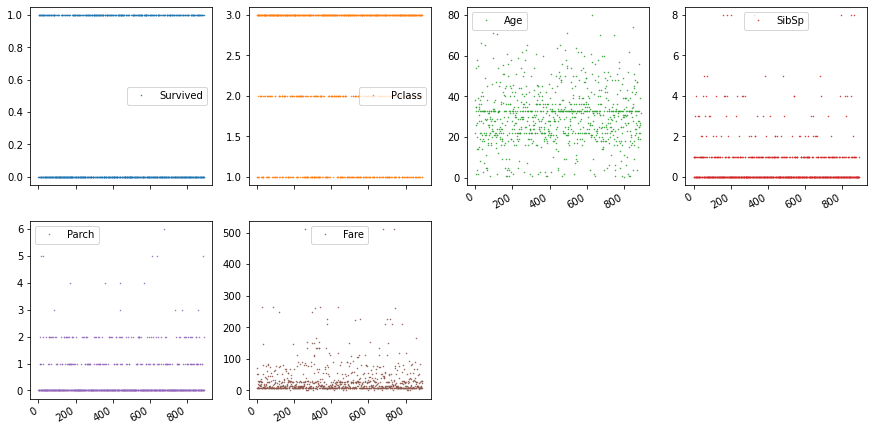

In [1835]:
# Función que muestra si hay entradas no deseadas o errores de carga extrañas
train.plot(lw=0,
        marker=".",
        subplots=True,
        layout=(-1, 4),
        figsize=(15, 8),
        markersize=1);

### 2.3.2. Non-numerical features

In [1836]:
# Se observa que ya no hay una gran dispersión de valores
train.describe(exclude=["number"])

,Sex,Embarked,Deck,Title
count,891,891,891,891
unique,2,3,9,4
top,male,S,Unknown,Mr
freq,577,646,687,537


### Distribución de valores variables categóricas
(luego de transformación de variables y tratamiento de missings)

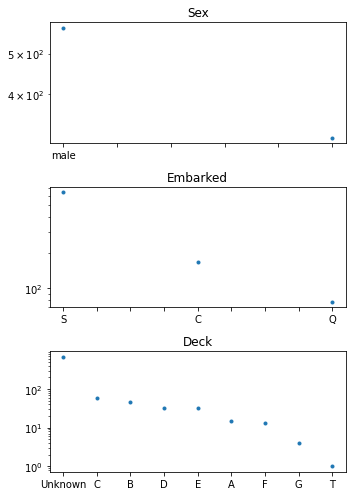

In [1837]:
# Se muestran gráficamente la cantidad de valores por característica

# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(5, 7))

# Identify non-numerical features
df_non_numerical = train.select_dtypes(exclude=["number"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

### 2.4. Conclusion of quality investigation

- Se observan valores que no dan información (Deck: muy representados('Unknown') o muy poco representados('T')

## 3. Content Investigation
Una vez entendida la estructura y la calidad del conjunto de datos, se realiza una exploración más profunda de los valores de las características y se observa cómo las diferentes características se relacionan entre sí.

### 3.1. Feature distribution

### Distribución de valores de variables numéricas luego de tratamiento de missings

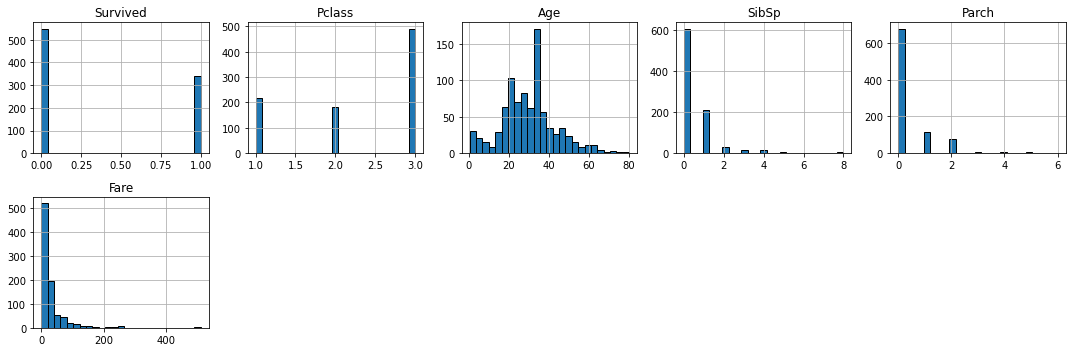

In [1838]:
# Plots the histogram for each numerical feature in a separate subplot
train.hist(bins=25, figsize=(15, 5), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

### % de entrada MÁS Frecuente de cada variable (todas las variables) _ Grado de DESBALANCEO de valores
Algunas características, como Parch en su mayoría contienen entradas de una sola categoría. <br/>
Utilizando el .mode() función, extraemos la relación de la entrada más frecuente para cada función y visualizar esa información. <br/>
Por ejemplo:   Deck: Unknown_687 / Total_891 = 77,1%

Deck        0.771044
Parch       0.760943
Embarked    0.725028
SibSp       0.682379
Sex         0.647587
dtype: float64

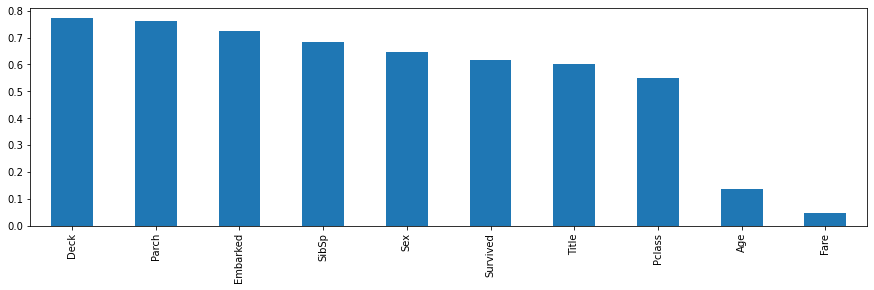

In [1839]:
# Collects for each feature the most frequent entry
most_frequent_entry = df.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = train.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));

### 3.2. Feature patterns
El objetivo de esta parte es doble:
1. Identificar patrones particulares dentro de una característica que nos ayudará a decidir si algunas entradas necesitan ser eliminadas o modificadas
2. Identificar relaciones particulares entre características que nos ayudarán a comprender mejor nuestro conjunto de datos

In [1840]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Deck', 'Title'],
      dtype='object')

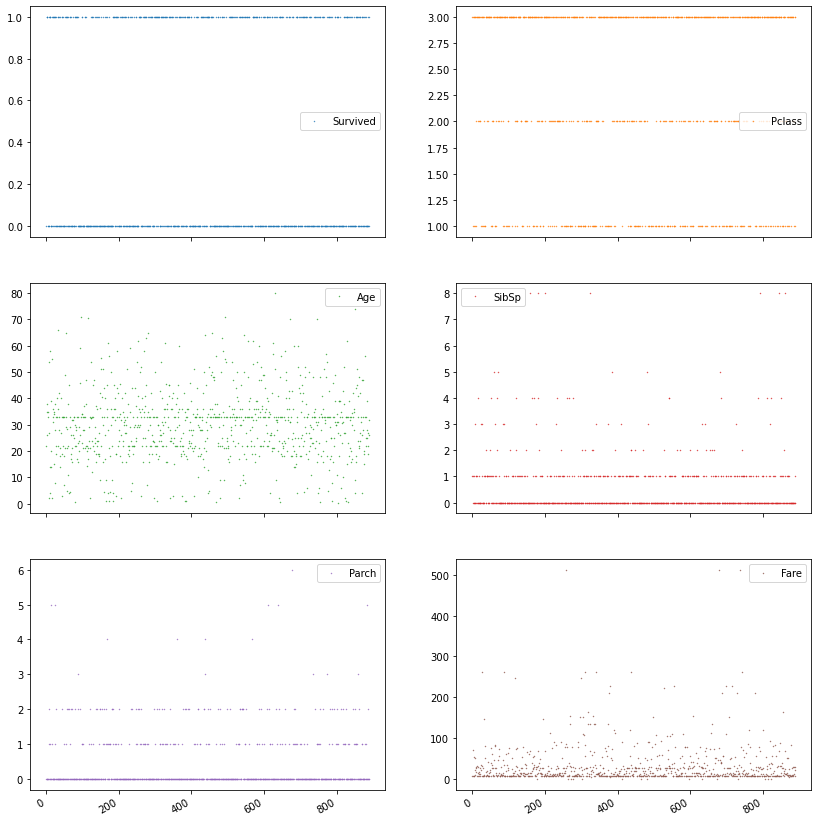

In [1841]:
train[['Survived', 'Pclass', 'Sex', 'Age','SibSp','Parch','Fare',
       'Embarked', 'Deck', 'Title']].plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2),
    markersize=0.8, figsize=(14, 16));

In [1842]:
# Creates mask to identify numerical features with at least 25 unique features
cols_continuous = train.select_dtypes(include="number").nunique() >= 25

### 3.2.1. Continuous features

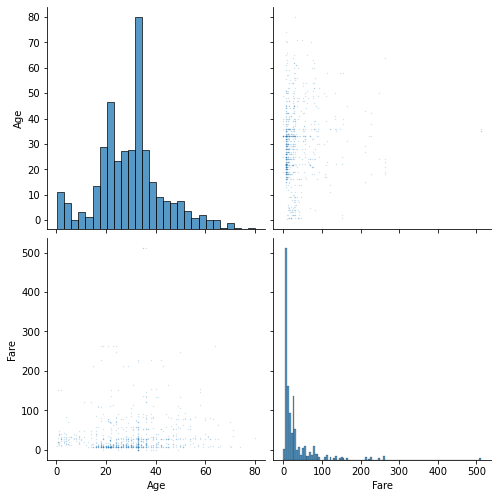

In [1843]:
# Create a new dataframe which only contains the continuous features
df_continuous = train[cols_continuous[cols_continuous].index]
df_continuous.shape


import seaborn as sns

sns.pairplot(df_continuous, height=3.5,
             plot_kws={"s": 2, "alpha": 0.2});

In [1844]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Deck      891 non-null    object 
 9   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [1845]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Deck', 'Title'],
      dtype='object')

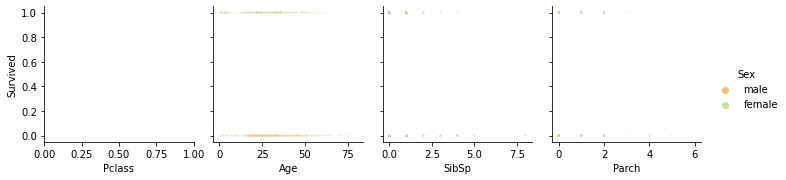

In [1846]:
sns.pairplot(
    train,
    plot_kws={"s": 3, "alpha": 0.2},
    hue='Sex',
    palette="Spectral",
    x_vars=['Pclass','Age', 'SibSp', 'Parch'],
    y_vars="Survived");

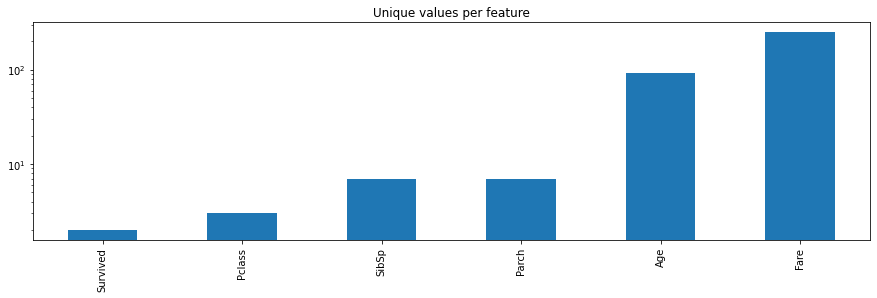

In [1847]:
# For each numerical feature compute number of unique entries
unique_values = train.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4),title="Unique values per feature");

### 3.2.2. Discrete and ordinal features

In [1848]:
# Create a new dataframe which doesn't contain continuous features
df_discrete = train[cols_continuous[~cols_continuous].index]
df_discrete.shape

(891, 4)

### Comprobación NO NA's

In [1849]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Deck      891 non-null    object 
 9   Title     891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


### Variables después de tratamiento de datos
1. Survived: Codificada como 0 (no) y 1 (si).  TARGET VARIABLE
2. Pclass: CATEGORICAL to NUMERICAL 1, 2 o 3.
3. Sex: CATEGORICAL to NUMERICAL 0:male - 1:female
4. Age: edad del pasajero. NUMERICAL 
5. SibSp: NUMERICAL
6. Parch: NUMERICAL
7. Fare: Precio pagado por el billete - NUMERICAL
8. Embarked: From CATEGORICAL to NUMERICAL
9. Deck: CATEGORICAL
10. Title: CATEGORICAL

In [1850]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,male,22.0,1,0,7.2500,S,Unknown,Mr
1,1,1,female,38.0,1,0,71.2833,C,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Unknown,Miss
3,1,1,female,35.0,1,0,53.1000,S,C,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Unknown,Mr


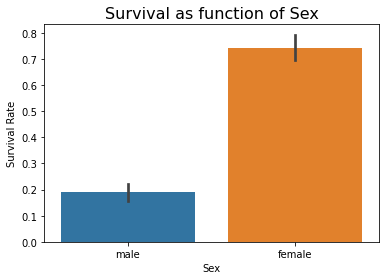

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [1851]:
sns.barplot(x='Sex', y='Survived', data=train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Sex", fontsize=16)

plt.show()
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

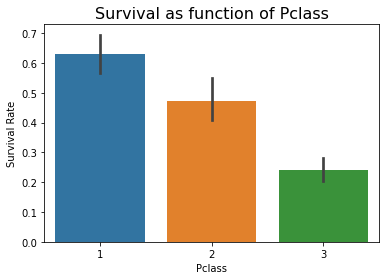

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [1852]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass", fontsize=16)

plt.show()
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

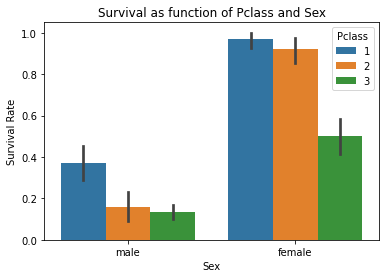

In [1853]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Sex")
plt.show()

In [1854]:
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [1855]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().iplot(kind='bar')

In [1856]:
train[['Sex','Survived']].groupby(['Sex']).mean().iplot(kind='barh')

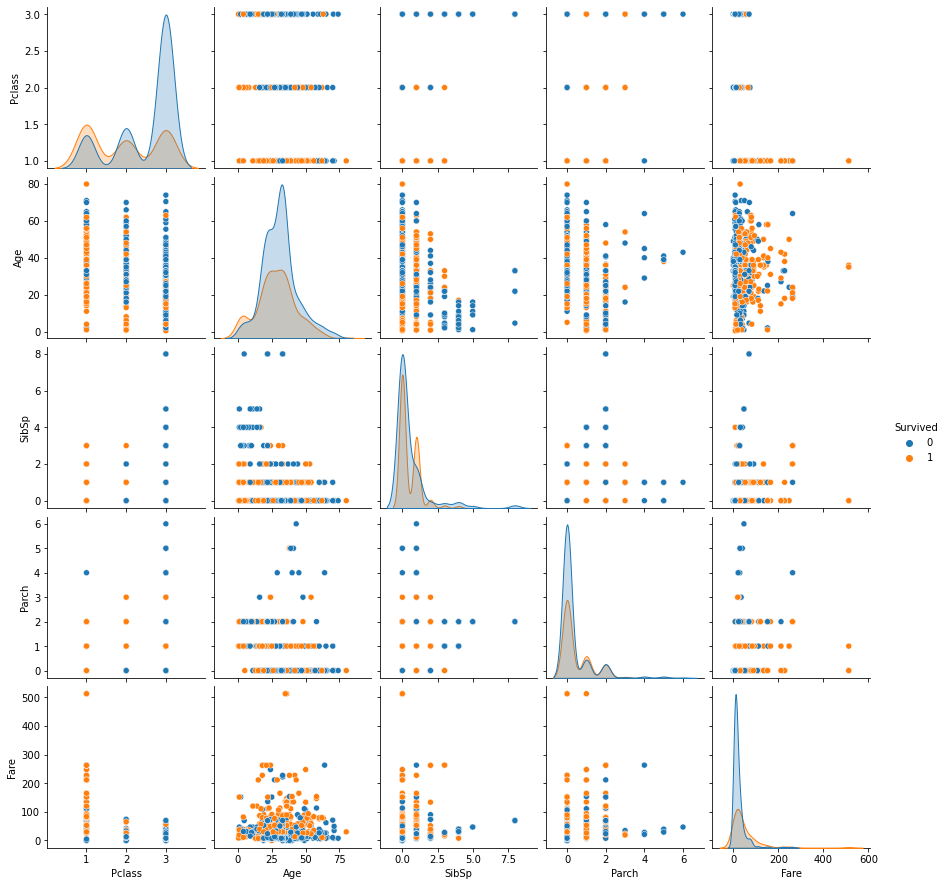

In [1857]:
sns.pairplot(data=train, hue="Survived")

In [1858]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.091630,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339902,0.083081,0.018443,-0.549500
Age,-0.091630,-0.339902,1.000000,-0.268185,-0.198708,0.089194
SibSp,-0.035322,0.083081,-0.268185,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.198708,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.089194,0.159651,0.216225,1.000000


In [1859]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [1860]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [1861]:
train[["Title", "Survived"]].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.798450
1,Miss,0.702703
0,Boys,0.575000
2,Mr,0.160149


In [1862]:
train[["Title", "Pclass",'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Pclass,Survived
3,Mrs,1.968992,0.798450
1,Miss,2.291892,0.702703
0,Boys,2.625000,0.575000
2,Mr,2.372439,0.160149


In [1863]:
train.to_csv('TitanicEdaOutput.csv', sep='\t')